In [1]:
from optimizer import Optimizer
from heuristics import * 
import random 

In [2]:
num_parts = 25
group_length = 2
max_time_machine_A = 24000 + ((num_parts - 10) * 4000)
max_time_machine_B = 22000

demand = {p: 50 for p in range(1, num_parts + 1)}
demand[num_parts + 1] = 0
demand[num_parts + 2] = 0

color_cost = {
    'Red': 10, 'Blue': 10, 'Green': 10, 'Yellow': 10,
    'Black': 10, 'Pink': 10, 'Purple': 10,
}

parts_colors = {i: random.choice(list(color_cost.keys())) for i in range(1, num_parts + 1)}

alpha = [[abs(1 - (parts_colors[p] == parts_colors[q])) for q in range(1, num_parts + 1)] for p in range(1, num_parts + 1)]
unit_production_time = 80
cleaning_time = 80

machines = [1,2]

In [3]:
tabu = TabuSearchScheduler(10,100,num_parts, group_length, max_time_machine_A, max_time_machine_B,
                 demand, color_cost, parts_colors, alpha, unit_production_time, 
                 cleaning_time, machines)

best_solution, best_value, elapsed_time = tabu()
best_value, elapsed_time
best_solution
print(round(elapsed_time, 4))
print(best_value)

0.0291
9


In [4]:
best_solution

{1: [(1, 0, 4000),
  (24, 4000, 8000),
  (22, 8080, 12080),
  (12, 12160, 16160),
  (5, 16240, 20240),
  (19, 20240, 24240),
  (21, 24240, 28240),
  (6, 28320, 32320),
  (8, 32320, 36320),
  (11, 36320, 40320),
  (15, 40320, 44320),
  (17, 44320, 48320),
  (20, 48320, 52320),
  (9, 52400, 56400),
  (14, 56400, 60400),
  (16, 60400, 64400),
  (10, 64480, 68480),
  (13, 68480, 72480),
  (18, 72480, 76480),
  (25, 76480, 80480)],
 2: [(23, 0, 4000),
  (2, 4080, 8080),
  (3, 8160, 12160),
  (4, 12240, 16240),
  (7, 16240, 20240)]}

In [5]:
proposed_optimizer = Optimizer(num_parts, group_length, max_time_machine_A, max_time_machine_B, demand, parts_colors, alpha, unit_production_time, cleaning_time)
proposed_model, optimization_time = proposed_optimizer(best_solution)
print(optimization_time)

Set parameter Username
Set parameter LicenseID to value 2581974
Academic license - for non-commercial use only - expires 2025-11-11
Set parameter IntFeasTol to value 1e-09
Set parameter Threads to value 8
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3698 rows, 1512 columns and 44732 nonzeros
Model fingerprint: 0x49fdab2b
Variable types: 54 continuous, 1458 integer (1458 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]

Loaded user MIP start with objective 9

Presolve removed 1196 rows and 212 columns
Presolve time: 0.07s
Presolved: 2502 rows, 1300 columns, 38600 nonzeros
Variable types: 50 continuous, 1250 integer (1250 binary)

Root relaxation: objective 0.000000e+00, 164 iterations, 0.00 seconds (0.01 work uni

In [6]:
benchmark_optimizer = Optimizer(num_parts, group_length, max_time_machine_A, max_time_machine_B, demand, parts_colors, alpha, unit_production_time, cleaning_time)
benchmark_model, optimization_time = benchmark_optimizer()
print(optimization_time)

Set parameter IntFeasTol to value 1e-09
Set parameter Threads to value 8
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3698 rows, 1512 columns and 44732 nonzeros
Model fingerprint: 0xf520c00a
Variable types: 54 continuous, 1458 integer (1458 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 1196 rows and 212 columns
Presolve time: 0.04s
Presolved: 2502 rows, 1300 columns, 38600 nonzeros
Variable types: 50 continuous, 1250 integer (1250 binary)
Found heuristic solution: objective 23.0000000
Found heuristic solution: objective 22.0000000
Found heuristic solution: objective 21.0000000

Root relaxation: objective 0.000000e+00, 164 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current N

## Visualization

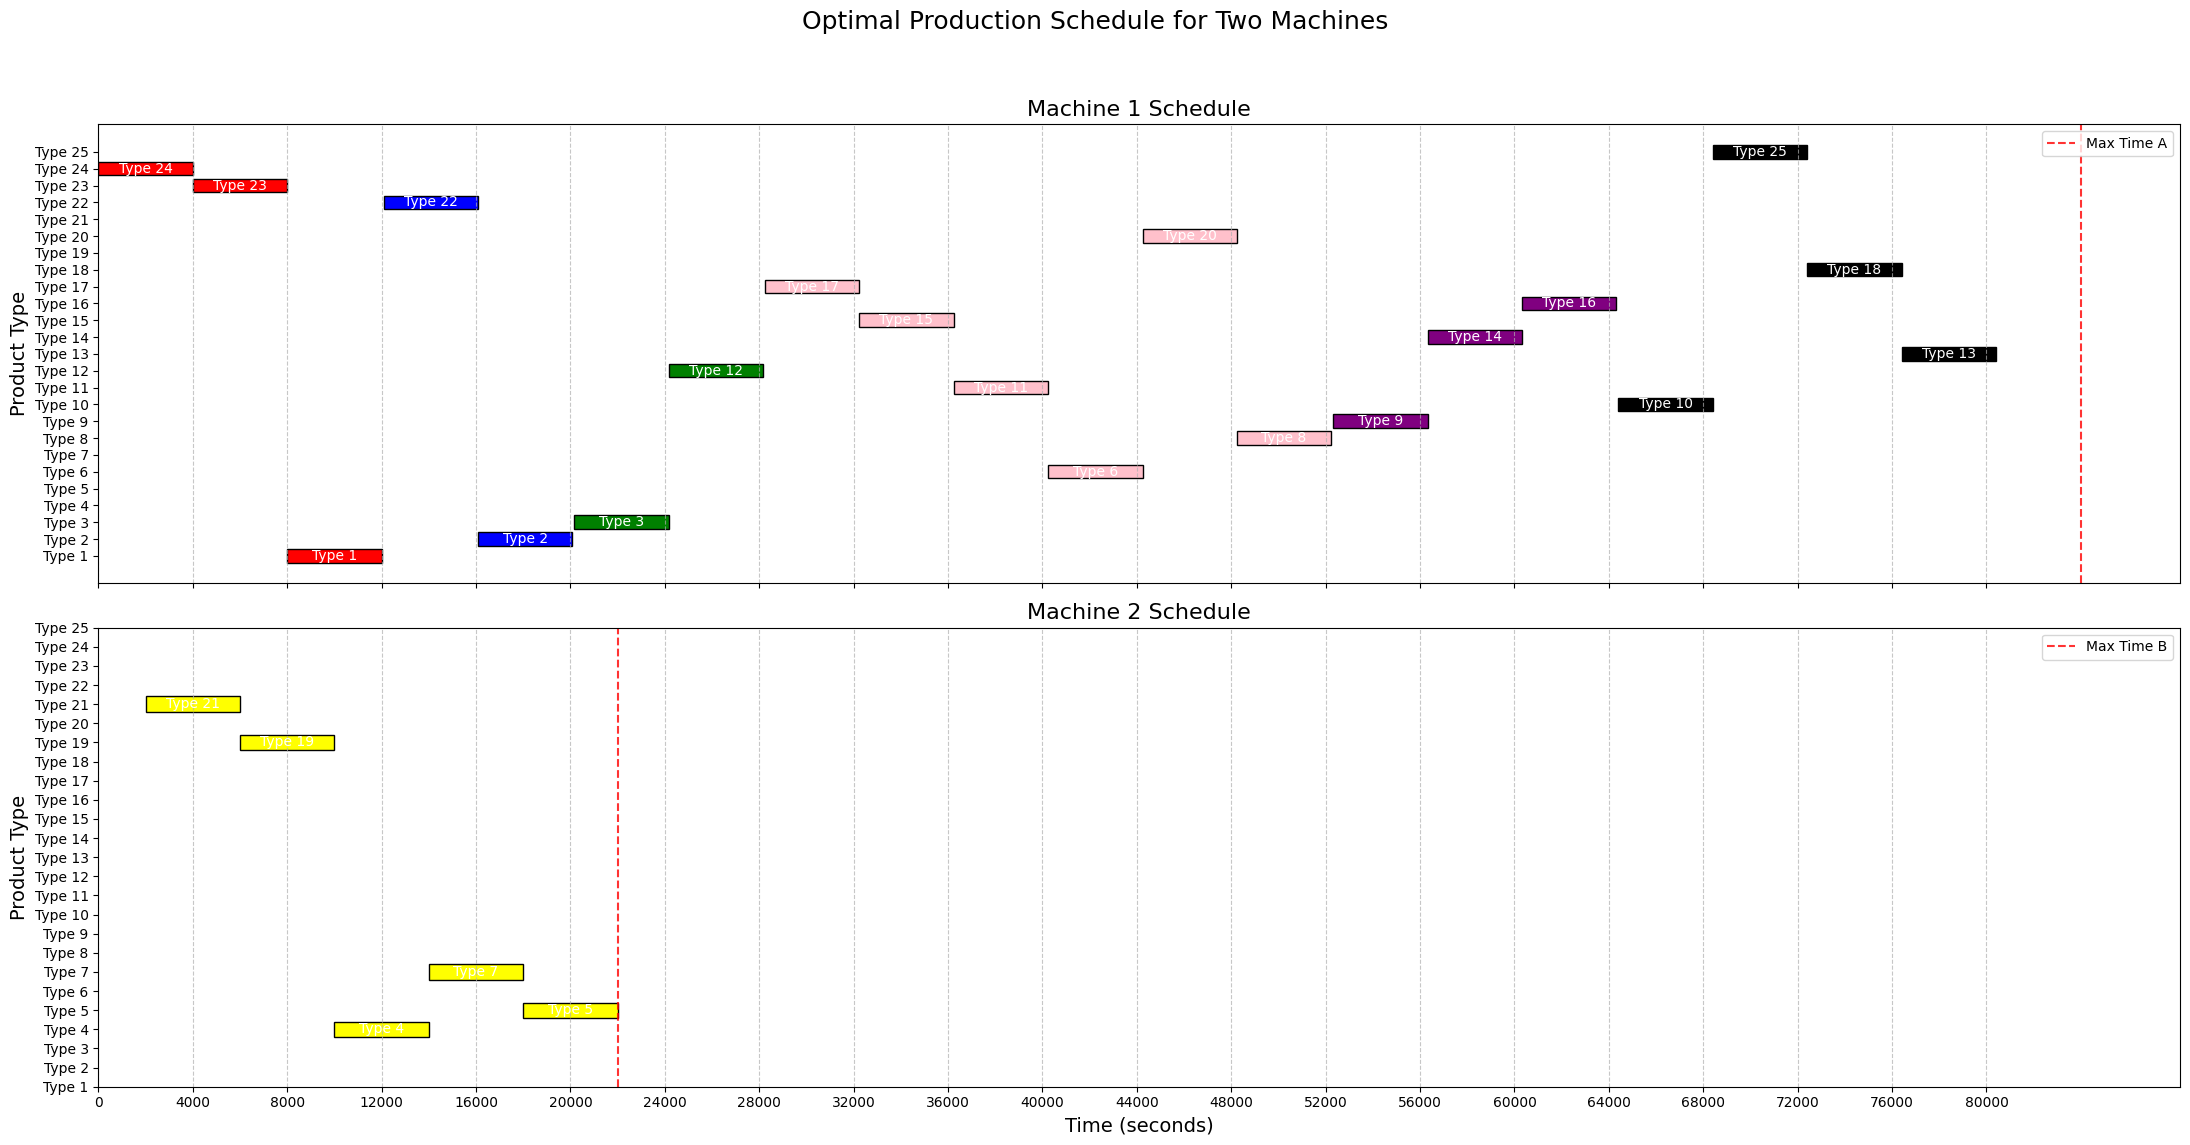

In [7]:
benchmark_optimizer.visualize()

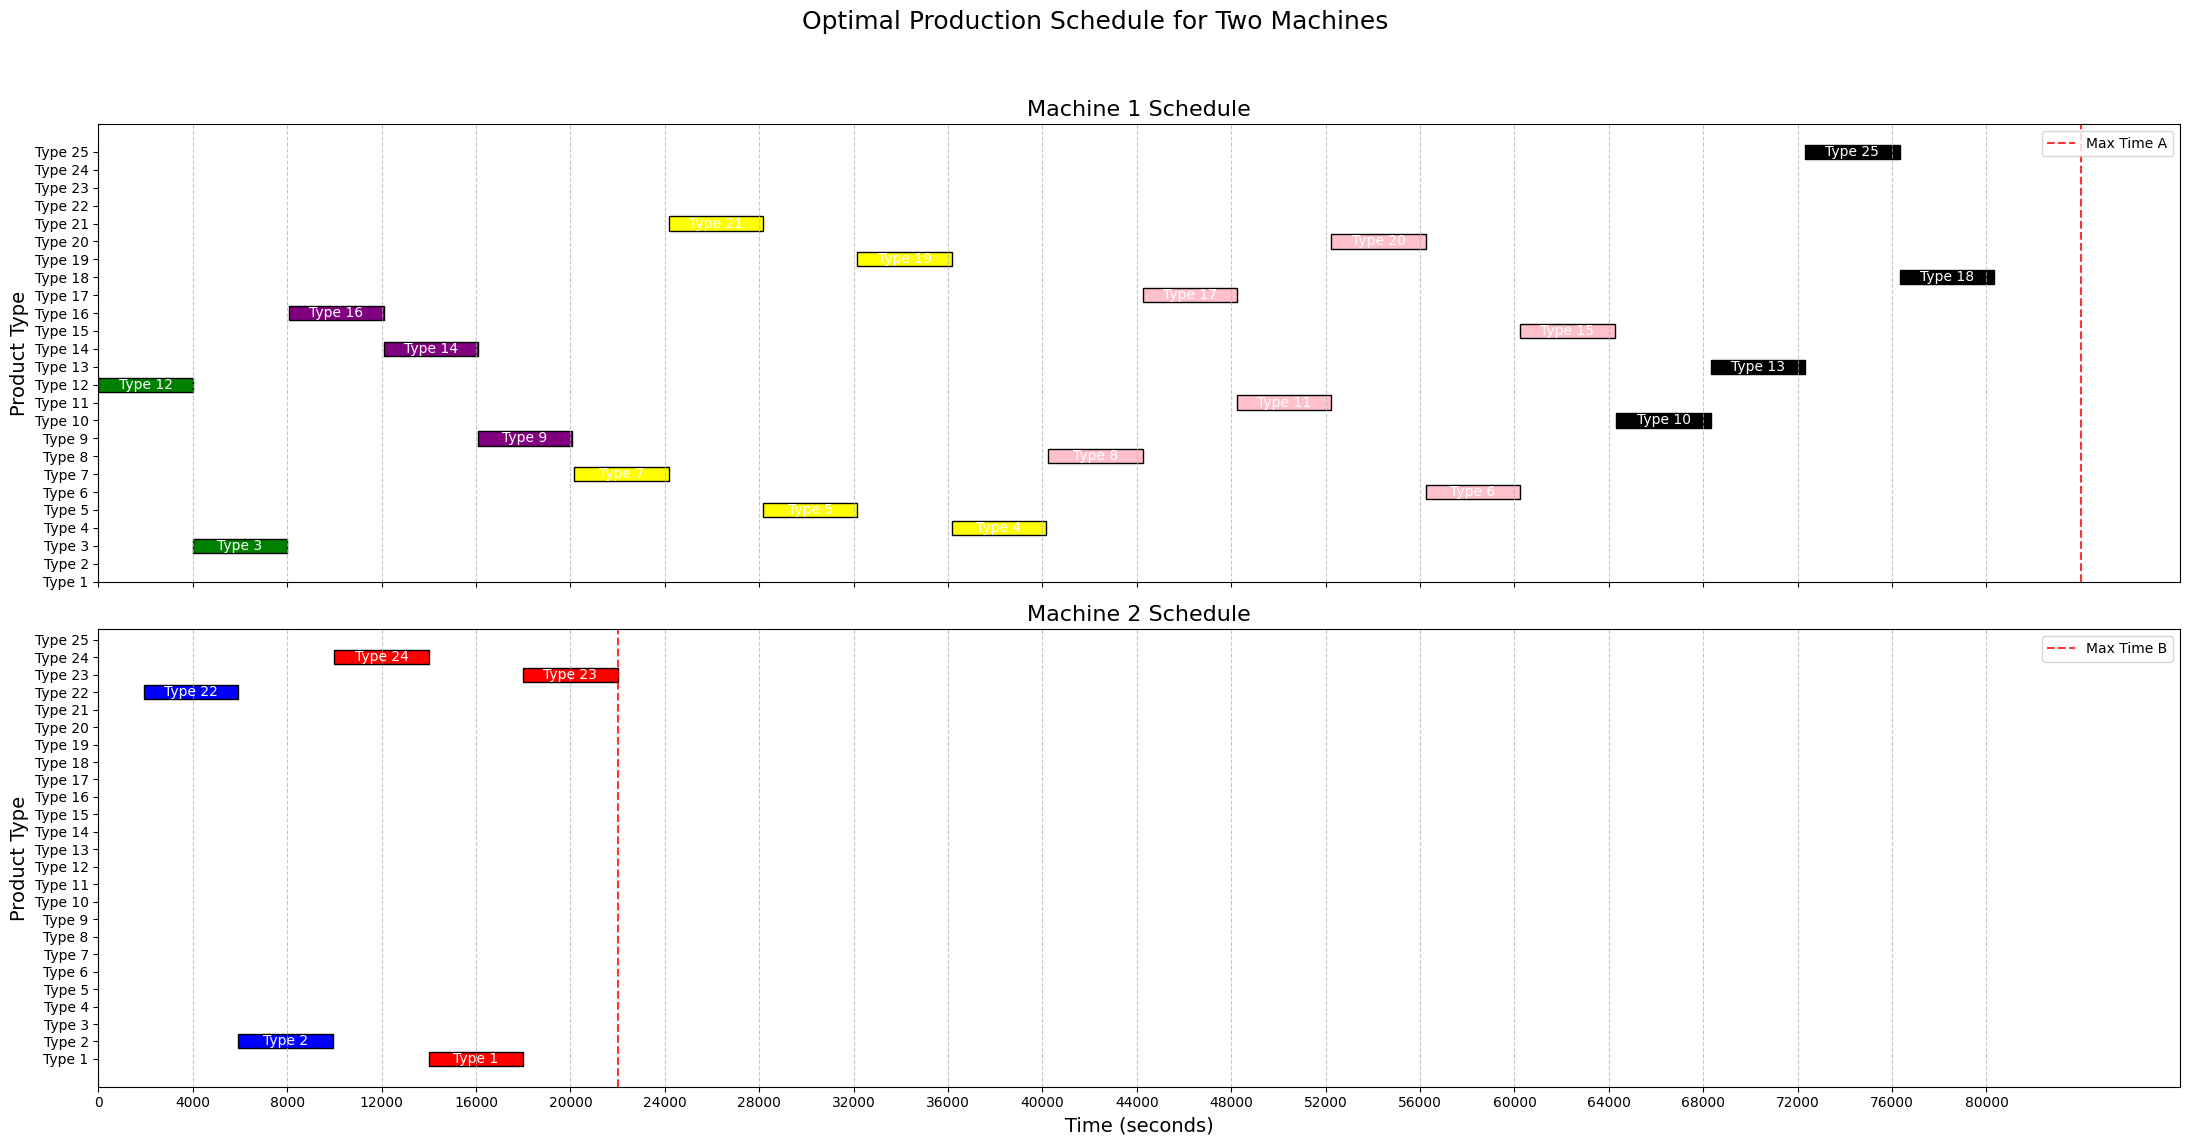

In [8]:
proposed_optimizer.visualize()

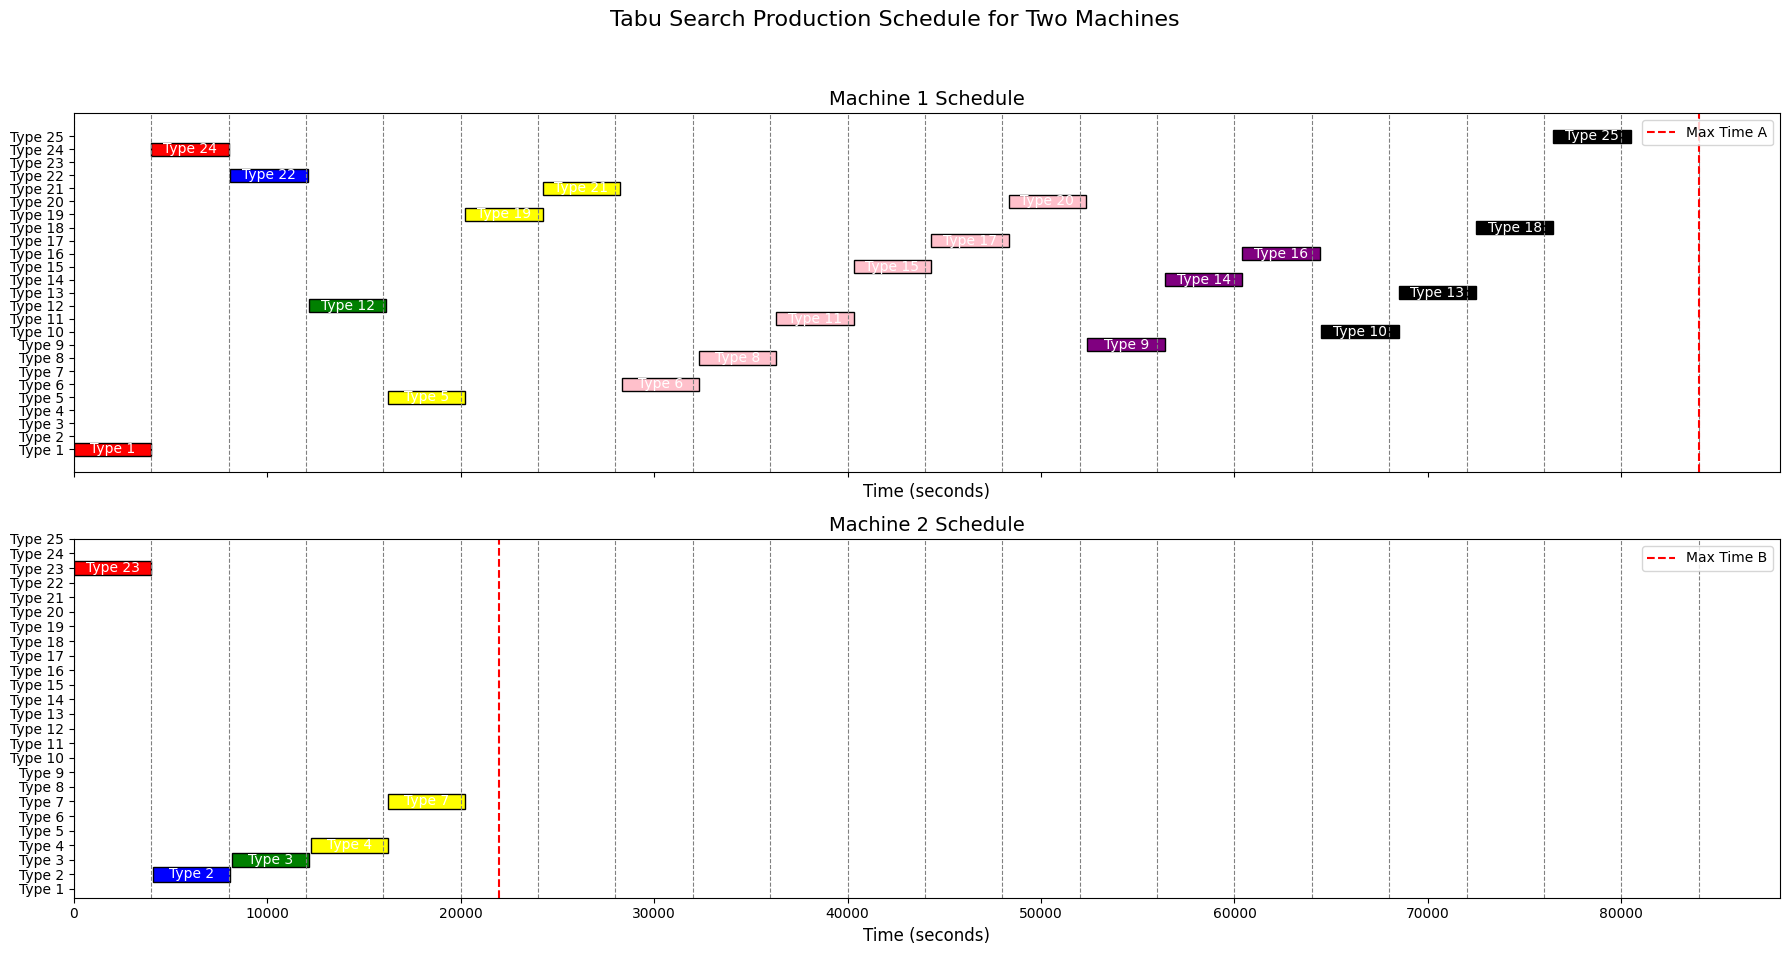

In [9]:
tabu.visualize()